<a href="https://colab.research.google.com/github/nalika/ESOF3675/blob/main/Assignment_1_Question_2_Solved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 - Question 2 Annoucement

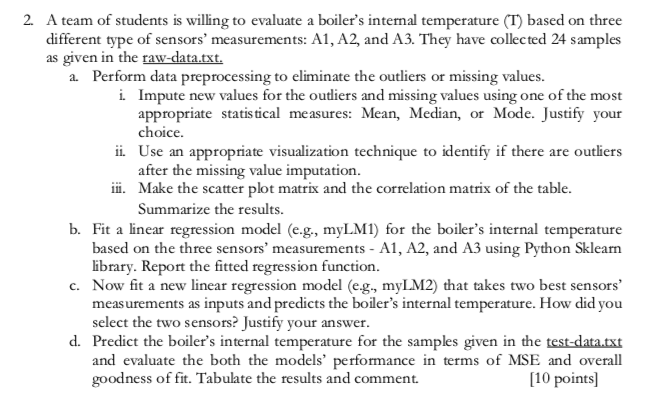

# Imports

In [ ]:
import io
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Reading Data

I manually converted the data from `.txt` to `.csv` since the **format** had inconsistencies.

In [ ]:
df_raw = pd.read_csv('./raw-data.csv')

In [ ]:
df_raw.head()

,T,A1,A2,A3
0,33.2,3.5,9.0,6.1
1,40.3,5.3,20.0,6.4
2,38.7,5.1,18.0,7.4
3,46.8,5.8,33.0,6.7
4,41.4,NaN,31.0,7.5


# Handling Missing Values

**Checking Data-types and Non-Missing Values**

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       24 non-null     float64
 1   A1      22 non-null     float64
 2   A2      23 non-null     float64
 3   A3      23 non-null     float64
dtypes: float64(4)
memory usage: 896.0 bytes


**Checking Missing Values**


In [ ]:
df_raw.isna().sum()

T     0
A1    2
A2    1
A3    1
dtype: int64

**Filling NA with Mean**

[(See reference)](https://pydatascience.org/2019/07/26/impute-nan-values-with-mean-of-column-pandas-python/)

In [ ]:
df_mean = df_raw.apply(lambda x: x.fillna(x.mean()), axis=0)

In [ ]:
df_mean

,T,A1,A2,A3
0,33.2,3.500000,9.000000,6.100000
1,40.3,5.300000,20.000000,6.400000
2,38.7,5.100000,18.000000,7.400000
3,46.8,5.800000,33.000000,6.700000
4,41.4,5.359091,31.000000,7.500000
5,37.5,6.000000,13.000000,5.900000
6,39.0,6.800000,25.000000,6.000000
7,40.7,5.500000,30.000000,6.073913
8,30.1,3.100000,5.000000,5.800000
9,52.9,7.200000,47.000000,8.300000


**Filling NA with Median**

In [ ]:
df_median = df_raw.apply(lambda x: x.fillna(x.median()), axis=0)

In [ ]:
df_median

,T,A1,A2,A3
0,33.2,3.5,9.0,6.1
1,40.3,5.3,20.0,6.4
2,38.7,5.1,18.0,7.4
3,46.8,5.8,33.0,6.7
4,41.4,5.4,31.0,7.5
5,37.5,6.0,13.0,5.9
6,39.0,6.8,25.0,6.0
7,40.7,5.5,30.0,6.0
8,30.1,3.1,5.0,5.8
9,52.9,7.2,47.0,8.3


**Filling NA with Mode**

In [ ]:
df_mode = df_raw.apply(lambda x: x.fillna(x.mode()[0]), axis=0)

In [ ]:
df_mode

,T,A1,A2,A3
0,33.2,3.5,9.0,6.1
1,40.3,5.3,20.0,6.4
2,38.7,5.1,18.0,7.4
3,46.8,5.8,33.0,6.7
4,41.4,4.5,31.0,7.5
5,37.5,6.0,13.0,5.9
6,39.0,6.8,25.0,6.0
7,40.7,5.5,30.0,5.0
8,30.1,3.1,5.0,5.8
9,52.9,7.2,47.0,8.3


**Pick one of the dataframes**

At this point, we will procede with dataframe generated by the approach using `median` value to impute missing values. Either `median` and `mode` are good candidates. The `mean` however, is not a good candidate if since it is very sensitive to the presence of outliers. In order to use the `mean` as a candidate, outliers would need to be handled before hand.

[Here](https://www.youtube.com/watch?v=vcbMinm_1Q8) is a good exemple that illustrates this.

# Looking for Outliers

We can use the **BoxPlot** to look for outliers. As we can observe below, none of the resulting dataframes have outliers.

From the [*seaborn* documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) we have.
> A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

[Here](https://youtu.be/Cm_852R8JPw) is a examplification on how the boxplot is built and outliers identified.

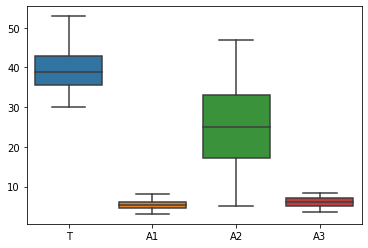

In [ ]:
sns.boxplot(data=df_median);

Since the data for the sensors `A1`, `A2` and `A3` are not in the same range. We could apply the `Z-score` normalization. This help us to beter visualize the data and also enhance the performance of gradient based learning models.

**NOTE**

1. Here we apply the `Z-score` to the entire dataframe only for convinience. Since we are predicting the temperature `T`, remember to use the original (un-normalized) value as target.

2. Additionally, if we decide to use the normalized values for training, the same normalization parameters (`mean` and `std`) for each variable out need to be applied to the test set to their respective variable before inference.
Therefore, here we use the normalized attributes merely for a better visualization on the data points distributions. The `Z-score` normalization will be done later using `sklearn` `pipeline`, which handles and ensures the use of the same `mean` and `std` for both train and test.

In [ ]:
df_z_score = df_median.apply(lambda x: (x-x.mean())/x.std(), axis=0)

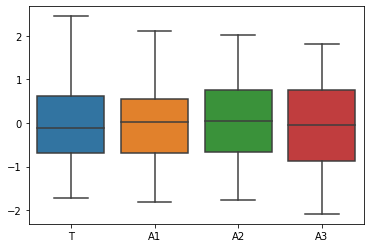

In [ ]:
sns.boxplot(data=df_z_score);

**Overlapping Boxplot with Datapoints**

We could take one of the plots and visualize it with the datapoints on top of them.

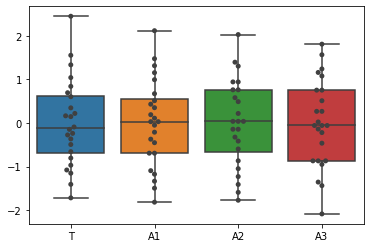

In [ ]:
sns.boxplot(data=df_z_score);
sns.swarmplot(data=df_z_score, color=".25");

# Scatter Plot

Here we use the `seaborn` package to display a PairGrid with pairwise Scatter Plots between attributes. Given

1. The upper portion of the matrix is the same as the lower portion, we change the lower portion to show a different distribution plot (`kdeplot`).
1. Given that each feature is 100% correlated with itself, having scatterplot in the diagonal is not as meaningful, thus `kdeplot` is also a better alternative.

> A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analagous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.

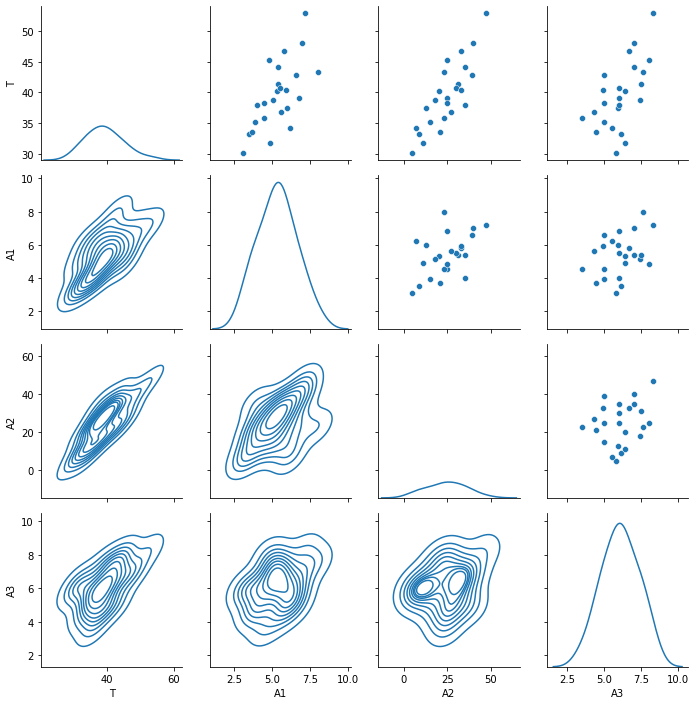

In [ ]:
g = sns.PairGrid(df_median)
g.map_upper(sns.scatterplot);
g.map_lower(sns.kdeplot);
g.map_diag(sns.kdeplot);

# Correlation Matrix

**Correlation Matrix**

In [ ]:
df_median.corr()

,T,A1,A2,A3
T,1.000000,0.673611,0.834608,0.605597
A1,0.673611,1.000000,0.495182,0.381250
A2,0.834608,0.495182,1.000000,0.249091
A3,0.605597,0.381250,0.249091,1.000000


Visualization of Correlation Matrix

In [ ]:
# Function provided in Lab 2
def correlation_plot(dataframe, output=""):
  df = dataframe
  df_corr = df.corr()
  fig, ax = plt.subplots(figsize=(10, 8))
  mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
  sns.heatmap(df_corr, mask=mask, annot=True, fmt=".2f",
            cmap='RdBu',
            vmin=-1, vmax=1,
            cbar_kws={"shrink": .8}
            )
  # yticks
  plt.yticks(rotation=0)
  plt.show()

  if output:
    fig.savefig(output, dpi=100);

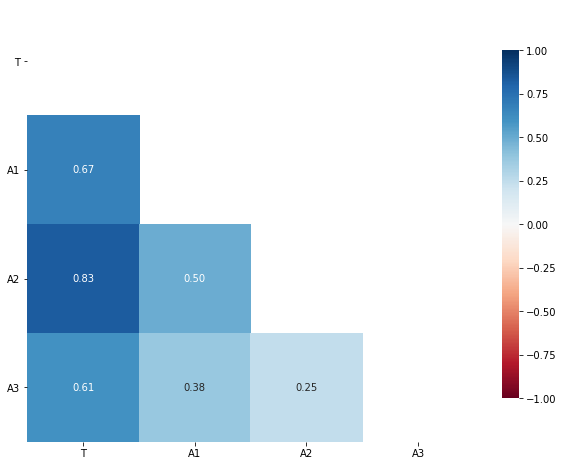

In [ ]:
correlation_plot(df_median)

# Data Load and Display Loss Function

In [ ]:
# Design for this assignment
# Shared on: https://stackoverflow.com/a/66181797/2313889
class DisplayLossCurve(object):
  def __init__(self, print_loss=False):
    self.print_loss = print_loss

  """Make sure the model verbose is set to 1"""
  def __enter__(self):
    self.old_stdout = sys.stdout
    sys.stdout = self.mystdout = io.StringIO()
  
  def __exit__(self, *args, **kwargs):
    sys.stdout = self.old_stdout
    loss_history = self.mystdout.getvalue()
    loss_list = []
    for line in loss_history.split('\n'):
      if(len(line.split("loss: ")) == 1):
        continue
      loss_list.append(float(line.split("loss: ")[-1]))
    plt.figure()
    plt.plot(np.arange(len(loss_list)), loss_list)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")

    if self.print_loss:
      print("=============== Loss Array ===============")
      print(np.array(loss_list))

    return True

In [ ]:
df_train = pd.read_csv('./raw-data.csv')
df_test = pd.read_csv('./test-data.csv')

# Linear Regression Models

## My Linear Model I

In [ ]:
def preprocessing1(dataframe):
  df_median = dataframe.apply(lambda x: x.fillna(x.median()), axis=0)
  X, Y = df_median.drop(columns='T').to_numpy(), df_median['T'].to_numpy()
  return X, Y

In [ ]:
X_train1, Y_train1 = preprocessing1(df_train)
X_test1, Y_test1 = preprocessing1(df_test)

The code below was based on [this reference](https://vitalflux.com/linear-regression-explained-python-sklearn-examples/)

In [ ]:
myLM1_pipeline = make_pipeline(StandardScaler(), SGDRegressor(verbose=1))

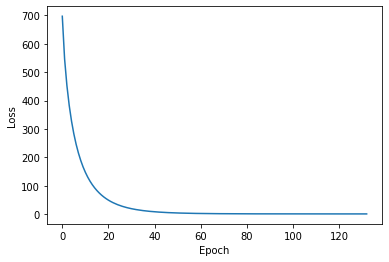

In [ ]:
# Fit a pipeline using Training dataset and related labels
with DisplayLossCurve():
  myLM1_pipeline.fit(X_train1, Y_train1)

In [ ]:
# Calculate the predicted value for training and test dataset
Y_train_pred1 = myLM1_pipeline.predict(X_train1)
Y_test_pred1 = myLM1_pipeline.predict(X_test1)

In [ ]:
# Mean Squared Error
MSE_train1 = mean_squared_error(Y_train1, Y_train_pred1)
MSE_test1 = mean_squared_error(Y_test1, Y_test_pred1)
print(f'MSE train: {MSE_train1:.3f}, test: {MSE_test1:.3f}')

MSE train: 2.939, test: 2.136


In [ ]:
# R-Squared
R2_train1 = r2_score(Y_train1, Y_train_pred1)
R2_test1 = r2_score(Y_test1, Y_test_pred1) 
print(f'R^2 train: {R2_train1:.3f}, test: {R2_test1:.3f}')

R^2 train: 0.898, test: 0.421


## My Linear Model II

In [ ]:
# 'A3' is selected to be droped, since it has the lower correlation with 'T'.
def preprocessing2(dataframe):
  df_median = dataframe.apply(lambda x: x.fillna(x.median()), axis=0)
  df_median = df_median.drop(columns='A3')
  X, Y = df_median.drop(columns='T').to_numpy(), df_median['T'].to_numpy()
  return X, Y

In [ ]:
X_train2, Y_train2 = preprocessing2(df_train)
X_test2, Y_test2 = preprocessing2(df_test)

In [ ]:
myLM2_pipeline = make_pipeline(StandardScaler(), SGDRegressor(verbose=1))

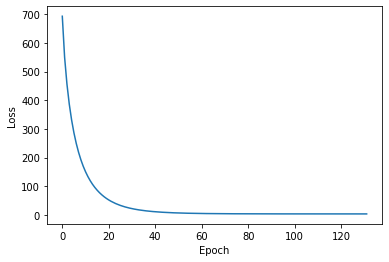

In [ ]:
# Fit a pipeline using Training dataset and related labels
with DisplayLossCurve():
  myLM2_pipeline.fit(X_train2, Y_train2)

In [ ]:
# Calculate the predicted value for training and test dataset
Y_train_pred2 = myLM2_pipeline.predict(X_train2)
Y_test_pred2 = myLM2_pipeline.predict(X_test2)

In [ ]:
# Mean Squared Error
MSE_train2 = mean_squared_error(Y_train2, Y_train_pred2)
MSE_test2 = mean_squared_error(Y_test2, Y_test_pred2)
print(f'MSE train: {MSE_train2:.3f}, test: {MSE_test2:.3f}')

MSE train: 6.157, test: 4.381


In [ ]:
# R-Squared
R2_train2 = r2_score(Y_train2, Y_train_pred2)
R2_test2 = r2_score(Y_test2, Y_test_pred2) 
print(f'R^2 train: {R2_train2:.3f}, test: {R2_test2:.3f}')

R^2 train: 0.786, test: -0.188
